In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview
1. MRW file

In [136]:
xls = pd.ExcelFile('1. MRW PointTransaction 2023_Installed workshop_Final.xlsx')
sheet1 = pd.read_excel(xls, 'Transaction')
sheet2 = pd.read_excel(xls, 'SKU_point_Ltr')
sheet3 = pd.read_excel(xls, 'Garange Profile')

In [137]:
print(sheet1.shape)
sheet1.sample(5)

(215656, 5)


,Distributor,ProductName,ProductSKU,ScanDate,UserId
46726,C,Mobil Delvac Modern,Mobil Delvac Modern 7L,2023-02-20,EXL_1628765165488
135671,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-09-07,EXL_1571241113734
122179,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-02,EXL_1572003622513
10244,A,Mobil Delvac Legend,Mobil_Delvac_Legend_6L_-_7L,2023-12-21,EXL_1639990027222
73254,D,Mobil Super AIO,Charcoal - Large 4L - 5L,2023-12-27,EXL_1691757071956


In [138]:
count_per_garange = sheet1.groupby('UserId').agg({'ScanDate': 'count'}).rename(columns={'ScanDate': 'count'})
sheet1_clean = pd.merge(sheet1.drop_duplicates(), count_per_garange, on='UserId', how='left')
sheet1_clean.head()

,Distributor,ProductName,ProductSKU,ScanDate,UserId,count
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,32
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-24,EXL_1692444744991,32
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-22,EXL_1692444744991,32
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-19,EXL_1692444744991,32
4,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-24,EXL_1652546700176,39


In [139]:
print(sheet2.shape)
sheet2.head()

(10, 3)


,ProductSKU,Points,Volume (L)
0,Mobil 1 Gold 4L - 6L,60,6
1,Silver - Large 4L,50,4
2,Gold - Large 4L,50,4
3,Mobil Super AIO - 7L,45,7
4,Mobil Super AIO 3L - 6L,40,5


In [140]:
print(sheet3.shape)
sheet3.head()

(4006, 5)


,OwnerId,Postcode,Province,District,Distributor
0,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,B
1,EXL_1651745414431,57120.0,เชียงราย,เขตพาน,C
2,EXL_1574261647294,10530.0,กรุงเทพมหานคร,เขตหนองจอก,A
3,EXL_1573728830730,10270.0,สมุทรปราการ,เขตเมืองสมุทรปราการ,A
4,EXL_1594802722891,30000.0,นครราชสีมา,เขตเมืองนครราชสีมา,A


In [141]:
merge_1 = pd.merge(sheet1_clean, sheet2, on='ProductSKU', how='left')
merge_1.head()

,Distributor,ProductName,ProductSKU,ScanDate,UserId,count,Points,Volume (L)
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,32,45,7
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-24,EXL_1692444744991,32,45,7
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-22,EXL_1692444744991,32,45,7
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-19,EXL_1692444744991,32,45,7
4,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-24,EXL_1652546700176,39,35,6


In [142]:
mrw = pd.merge(merge_1, sheet3, left_on=['UserId', 'Distributor'], right_on=['OwnerId', 'Distributor'], how='left')
mrw = mrw.drop_duplicates()
print(mrw.shape)
mrw.head()

(36015, 12)


,Distributor,ProductName,ProductSKU,ScanDate,UserId,count,Points,Volume (L),OwnerId,Postcode,Province,District
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-24,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-22,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-08-19,EXL_1692444744991,32,45,7,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์
4,A,Mobil Super FF,Mobil Super FF 4L - 7L,2023-11-24,EXL_1652546700176,39,35,6,NaN,NaN,NaN,NaN


Handle null/ missing values

In [143]:
mrw.isnull().sum()

Distributor       0
ProductName       0
ProductSKU        0
ScanDate          0
UserId            0
count             0
Points            0
Volume (L)        0
OwnerId        3649
Postcode       4451
Province       3649
District       3649
dtype: int64

In [144]:
mrw = mrw.rename(columns={'District ': 'District'})

for label in ['OwnerId', 'Postcode', 'Province', 'District']:
    print(f"{label}: { len(mrw[ mrw[label].isnull() ]) }")

OwnerId: 3649
Postcode: 4451
Province: 3649
District: 3649


In [145]:
len(mrw[ mrw['Province'].isnull() ])

3649

In [146]:
mrw.dropna(how='any', inplace=True)

Find Distributor per Province and region

In [147]:
mrw.groupby(['Distributor', 'Province']).agg({'OwnerId': 'count'}).sample(10)

OwnerId
Distributor Province            
D           นราธิวาส          31
            ภูเก็ต             1
C           น่าน             334
A           บึงกาฬ             1
C           ตาก              157
A           ชัยนาท           222
B           สมุทรสงคราม      224
C           พิษณุโลก         421
A           ฉะเชิงเทรา       288
            สมุทรปราการ      736

2. MER file

In [148]:
mer = pd.ExcelFile('2. MER PointTransaction 2023_RetailsResellers_Final.xlsx')
mer_sheet1 = pd.read_excel(mer, 'MER Transaction')
mer_sheet2 = pd.read_excel(mer, 'Point Per Litre')

In [149]:
print(mer_sheet1.shape)
mer_sheet1.head()

(9429, 8)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L)
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080


In [150]:
print(mer_sheet2.shape)
mer_sheet2.head()

(145, 2)


,MatNo,Points
0,144673,10
1,140521,10
2,144473,10
3,145832,10
4,140418,10


In [151]:
mer = pd.merge(mer_sheet1, mer_sheet2, on='MatNo', how='left')
print(mer.shape)
mer.head()

(9429, 9)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168,1
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912,1
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340,1
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640,1
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080,1


Fix Typos of Material Name

In [152]:
mat_default = mer_sheet1.sort_values(['MatNo', 'Material Name']).groupby('MatNo').head(1)\
                        .loc[:, ['MatNo', 'Material Name']].set_index('MatNo')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('โมบิล', 'MOBIL')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('เดลแวค', 'DELVAC')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('สเปเชียล', 'SPECIAL')
mat_default.loc[ mat_default.index == 140563, 'Material Name'] = 'MOBIL DELVAC 1 GEAR OIL 75W90, 1/35LB'

mat_default.shape
# with pd.option_context('display.max_rows', None):
#     display(mat_default)

(145, 1)

In [153]:
for i in mer['MatNo'].unique():
    mer.loc[mer['MatNo'] == i, 'Material Name'] = mat_default.loc[i, 'Material Name']
            
mer[ ['MatNo', 'Material Name']].drop_duplicates().shape

(145, 2)

Points per อู่

In [154]:
mer['Provincename'] = mer['Provincename'].replace('N\A', np.nan)
mer[mer['Provincename'].isnull()].head()

,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
1705,2023-11-03,A,ERW_A7QF2022060002,Retails,NaN,140043,"MOBIL ATF 3309 , 12x1 LT CTN",5392,1
1845,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140418,MOBIL 1 TBD 5W-40 4X6L/CAR,5088,10
1910,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140521,"MOBIL 1 0W-40 (SN), 4x4LT CTN",608,10
2260,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,6544,1
2275,2023-10-26,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,1104,1


In [155]:
mer.dropna(inplace=True)
mer['Provincename'].isna().any()

False

In [156]:
# ใช้ method unique() เพื่อหาค่าที่ไม่ซ้ำกันใน column 'Provincename'
unique_provinces = mer['Provincename'].unique()

# แสดงผลลัพธ์
print(unique_provinces)
print()
print(len(mer['Provincename'].unique()))

['Pathum Thani' 'Songkhla' 'Sukhothai' 'Kamphaeng Phet' 'Chon Buri'
 'Phrae' 'Lamphun' 'Chiang Mai' 'Nakhon Sawan' 'Phitsanulok' 'Chiang Rai'
 'Kanchanaburi' 'Nakhon Pathom' 'Samut Sakhon' 'Chachoengsao' 'Rayong'
 'Bangkok' 'Phichit' 'Phetchabun' 'Uttaradit' 'Nonthaburi' 'Chanthaburi'
 'Nakhon Ratchasima' 'Lop Buri' 'Samut Prakan' 'Surat Thani' 'Pattani'
 'Phangnga' 'Tak' 'Saraburi' 'Udon Thani' 'Phuket' 'Nakhon Si Thammarat'
 'Ratchaburi' 'Phayao' 'Suphan Buri' 'Uthai Thani' 'Sa Kaeo' 'Buri Ram'
 'Chainat' 'Chai Nat' 'Trat' 'Sing Buri' 'Phatthalung' 'Krabi' 'Khon Kaen'
 'Surin' 'Chumphon' 'Prachuap Khiri Khan' 'Nan' 'Chaiyaphum' 'Yasothon'
 'Ubon Ratchathani' 'Lampang' 'Trang' 'Ang Thong'
 'Phra Nakhon Si Ayutthaya' 'Phetchaburi' 'Nakhon Phanom' 'Roi Et'
 'Nakhon Nayok' 'Nong Bua Lam Phu' 'Maha Sarakham' 'Loei' 'Prachin Buri'
 'Sakon Nakhon' 'Nong Khai' 'Si Sa Ket' 'Mukdahan' 'Kalasin' 'Satun'
 'Bueng Kan']

72


In [157]:
result = mer.groupby('Distributor')['Provincename'].apply(lambda x: list(x.unique())).reset_index()
result.columns = ['Distributor', 'Unique Provinces']
print(result)
del result

  Distributor                                   Unique Provinces
0           A  [Pathum Thani, Chon Buri, Chachoengsao, Rayong...
1           B  [Kanchanaburi, Nakhon Pathom, Samut Sakhon, Ba...
2           C  [Sukhothai, Kamphaeng Phet, Chon Buri, Phrae, ...
3           D  [Songkhla, Surat Thani, Pattani, Phangnga, Phu...


## ลองเล่น Time series

<Axes: xlabel='Invoicedate', ylabel='New_Volume(L)'>

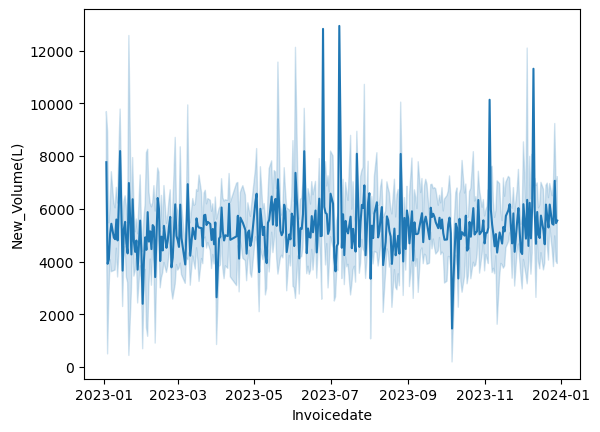

In [177]:
# Trending of sales in mer
sns.lineplot(data=mer, x='Invoicedate', y='New_Volume(L)')

<Axes: xlabel='count', ylabel='Count'>

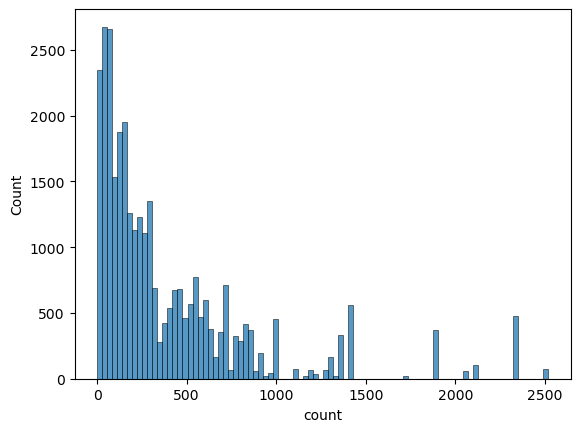

In [189]:
# count of mrw
# sns.lineplot(data=mrw, x='ScanDate', y='count')

# order per day
sns.histplot(data=mrw, x='count')

<Axes: xlabel='Month', ylabel='quantity'>

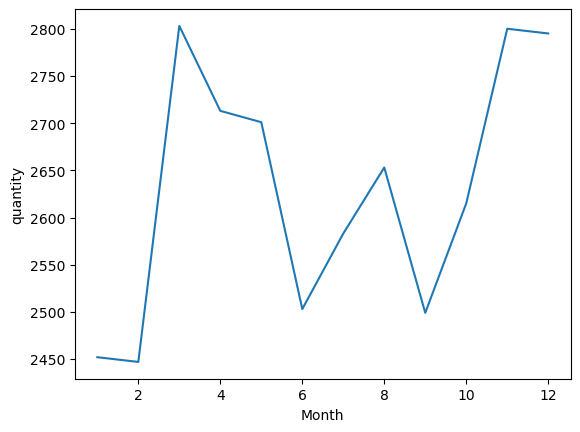

In [188]:
time_series = mrw.copy()
time_series['Month'] = mrw['ScanDate'].dt.month
time_series['Year'] = mrw['ScanDate'].dt.year
sales_per_month = time_series.groupby(['Year', 'Month']).agg({'UserId': 'count'}).rename(columns={'UserId': 'quantity'})

sns.lineplot(data=sales_per_month, x='Month', y='quantity')